# PARAMETER FITTING PART 1B: ANALYZING FITS


This notebook provides explores the key elements of fitting parameters.

# Preliminaries

In [1]:
!pip install -q tellurium
!pip install -q SBstoat

In [2]:
# Python packages used in this chapter
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import urllib.request # use this library to download file from GitHub
import tellurium as te
from SBstoat.namedTimeseries import NamedTimeseries, TIME
from SBstoat.modelFitter import ModelFitter
import SBstoat

In [3]:
def getSharedCodes(moduleName):
  """
  Obtains common codes from the github repository.

  Parameters
  ----------
  moduleName: str
      name of the python module in the src directory
  """
  url = "https://github.com/sys-bio/network-modeling-summer-school-2021/raw/main/src/%s.py" % moduleName
  local_python = "python.py"
  _, _ = urllib.request.urlretrieve(url=url, filename=local_python)
  with open(local_python, "r") as fd:
    codeStr = "".join(fd.readlines())
  print(codeStr)
  exec(codeStr, globals())

# Acquire codes
getSharedCodes("util")

# TESTS
assert(isinstance(LINEAR_PATHWAY_DF, pd.DataFrame))

import pandas as pd
import urllib.request

# Linear pathway data
BASE_URL = "https://github.com/sys-bio/network-modeling-summer-school-2021/raw/main/"
BASE_DATA_URL = "%sdata/" % BASE_URL
BASE_MODULE_URL = "%ssrc/" % BASE_URL
BASE_MODEL_URL = "%smodels/" % BASE_URL
LOCAL_FILE = "local_file.txt"


def getData(csvFilename):
    """
    Creates a dataframe from a CSV structured URL file.

    Parameters
    ----------
    csvFilename: str
        Name of the CSV file (w/o ".csv" extension)

    Returns
    -------
    pd.DataFrame
    """
    url = "%s%s.csv" % (BASE_DATA_URL, csvFilename)
    filename, _ = urllib.request.urlretrieve(url, filename=LOCAL_FILE)
    return pd.read_csv(LOCAL_FILE)

def getModule(moduleName):
    """
    Obtains common codes from the github repository.
  
    Parameters
    ----------
    moduleName: str
        name of the python module in the src directory
    """
    url = "%s%s.py" % (BASE_MODULE_URL, moduleName)
    _, _ = urllib.request.urlretrieve(url, 

In [15]:
print(WOLF_MODEL)

// Created by libAntimony v2.12.0.3
model *Jana_WolfGlycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, NAD in compartment_, NADH in compartment_;
  species $External_glucose in compartment_, $ethanol in compartment_, $Glycerol in compartment_;
  species $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + NADH => NAD + $Glycerol; J3_k*glyceralde

# Helpers

In [21]:
def plotLinearPathway(is_plot=True):
    SPECIES_NAMES = ["S1", "S2", "S3", "S4", "S5"]
    fig, ax = plt.subplots(1)
    numRow, numCol = np.shape(LINEAR_PATHWAY_ARR)
    for icol in range(1, numCol):
        ax.scatter(LINEAR_PATHWAY_ARR[:, 0], LINEAR_PATHWAY_ARR[:, icol])
        _ = plt.legend(SPECIES_NAMES)
    if not is_plot:
        plt.close()

# Tests
plotLinearPathway(is_plot=False)
print("OK!")

OK!


# Linear Pathway Model & Data

To make these ideas concrete, we use the linear pathway model.

In [4]:
print(LINEAR_PATHWAY_MODEL)

R1:  S1 -> S2; k1*S1  
R2: S2 -> S3; k2*S2
R3: S3 -> S4; k3*S3
R4: S4 -> S5; k4*S4

S1 = 10

// Parameters
k1 = 0; # Nominal value of parameter
k2 = 0; # Nominal value of parameter
k3 = 0; # Nominal value of parameter
k4 = 0; # Nominal value of parameter



Note that the values of the parameters are 0! This is not because their true value is 0.
Rather, it's because we don't know the value of these parameters.

It is very common to have parameters with unknown values in kinetics models. Typically, we know the range
of the parameter values, but not a suitable value itself.

So, how do we run a model with known values for *all* of its parameters? The answer is that we estimate or **fit paramter values** based on observed data.

For this example, the observational data are in the file specified in ``LINEAR_PATHWAY_DATA``.

In [5]:
LINEAR_PATHWAY_DF

,time,S1,S2,S3,S4,S5
0,1.000000,8.516780,0.000000,0.000000,0.000000,0.000000
1,1.090909,7.453911,0.761657,0.073722,0.006608,0.000482
2,1.181818,8.282868,1.212772,0.260522,0.038722,0.007036
3,1.272727,7.613030,1.810058,0.352075,0.083708,0.031581
4,1.363636,6.315379,2.254405,0.699869,0.159682,0.085216
...,...,...,...,...,...,...
95,9.636364,0.001848,0.001562,0.001627,0.001779,10.644394
96,9.727273,0.001355,0.001709,0.001589,0.001345,9.547320
97,9.818182,0.001299,0.001596,0.001622,0.001715,9.130269
98,9.909091,0.001271,0.001288,0.001250,0.001256,10.895552


In [6]:
LINEAR_PATHWAY_ARR[0:10, :]

array([[1.00000000e+00, 8.51678036e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.09090909e+00, 7.45391115e+00, 7.61656564e-01, 7.37219347e-02,
        6.60778277e-03, 4.82334671e-04],
       [1.18181818e+00, 8.28286758e+00, 1.21277213e+00, 2.60522199e-01,
        3.87223027e-02, 7.03598959e-03],
       [1.27272727e+00, 7.61303021e+00, 1.81005756e+00, 3.52075303e-01,
        8.37075579e-02, 3.15814521e-02],
       [1.36363636e+00, 6.31537918e+00, 2.25440468e+00, 6.99869349e-01,
        1.59682183e-01, 8.52162442e-02],
       [1.45454545e+00, 7.60029359e+00, 2.53934763e+00, 1.00050901e+00,
        3.01052446e-01, 2.08922107e-01],
       [1.54545455e+00, 5.38910939e+00, 2.35260007e+00, 8.49514531e-01,
        3.69980464e-01, 3.06653894e-01],
       [1.63636364e+00, 5.41140224e+00, 2.98080193e+00, 1.20718732e+00,
        6.36913521e-01, 4.75265940e-01],
       [1.72727273e+00, 4.56449516e+00, 2.01172053e+00, 1.32967397e+00,
        6.53568960e-01, 

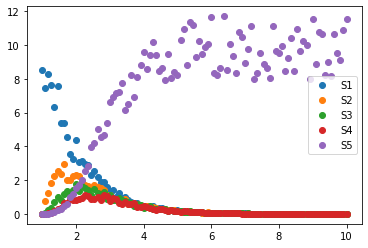

In [23]:
plotLinearPathway()

The following sections provide details of parameter fitting using the ``PATHWAY_MODEL``.

# Fitting Basics <a class="anchor" id="parameter-fitting-fitting-basics"></a>

Some key concepts are:
- A **parameter** is a constant whose value is unknown.
- **Observed data** are data that are used for fitting parameter values.
- **Fitted data** are data produced by a simulation for an assignment of values to parameters.
- **Residuals** are the difference between observed data and simulated data.

The basic algorithm for fitting is described below.
The algorithm estimates ``parameters``, the vector of values of unknown parameters.
The inputs to the algoritm are:
- ``model`` - the simulation model
- ``parameters`` parameters to estimate with their initial values
- ``observedData`` observed data used for fitting

1. **Initialization**
   1. ``fittedData = simulate(model, parameters)``
   1. ``residuals = observedData - fittedData``
1. **Loop**
   1. ``parameters`` = adjust ``parameters`` based on ``residuals``
   1. ``fittedData = simulation(parameters)``
   1. ``residuals = observedData - fittedData``
   1. if ``residuals`` are small
       1. ``return parameters``

The algorithm is fairly straight forward, with one exception.
Step A - "adjust ``parameters`` based on ``residuals``" How are these adjustments made?

The adjustments are made based on an optimization that chooses parameter values that
minimize the residuals.
We give a brief discussion of optimization in the next section.

# Exercise
For the ``LINEAR_PATHWWAY_MODEL`` model and ``LINEAR_PATHWAY_ARR`` data:

1. Plot the residuals for all chemical species using a model with the true values of parameters. Use the values 1, 2, 3, 4 or ``k1``, ``k2``, ``k3``, ``k4``.
Where are the residuals the largest? Why?

1. Evaluate possible fits for ``k1``. You can quantify the "goodness" of a fit by calculating **RSQ**, the sum of squared residuals, for a set of parameter values. Run simulations with ``k1`` in the range $[0, 4]$ for 20 equally separated values. Plot RSQ. Where on the plot does the true value appear?

1. Use the approach in (2) to propose an algorithm for parameter estimation. (No code is required; just a description in words.) What is the performance of this algorithm as the number of parameters increases?

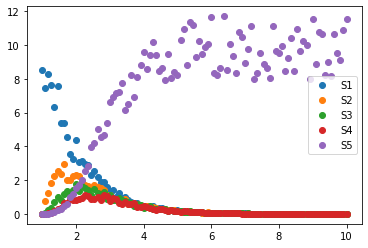

In [24]:
plotLinearPathway()

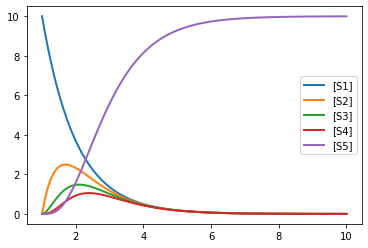

In [9]:
# Getting started on item (1)
rr = te.loada(LINEAR_PATHWAY_MODEL)
rr["k1"] = 1
rr["k2"] = 2
rr["k3"] = 3
rr["k4"] = 4
fittedData = rr.simulate(1, 10, 100)
rr.plot()

In [10]:
# Residual for S1
times = LINEAR_PATHWAY_ARR[:, 0] # time
observedS1Arr = LINEAR_PATHWAY_ARR[:, 1] # S1


In [11]:
LINEAR_PATHWAY_DF

,time,S1,S2,S3,S4,S5
0,1.000000,8.516780,0.000000,0.000000,0.000000,0.000000
1,1.090909,7.453911,0.761657,0.073722,0.006608,0.000482
2,1.181818,8.282868,1.212772,0.260522,0.038722,0.007036
3,1.272727,7.613030,1.810058,0.352075,0.083708,0.031581
4,1.363636,6.315379,2.254405,0.699869,0.159682,0.085216
...,...,...,...,...,...,...
95,9.636364,0.001848,0.001562,0.001627,0.001779,10.644394
96,9.727273,0.001355,0.001709,0.001589,0.001345,9.547320
97,9.818182,0.001299,0.001596,0.001622,0.001715,9.130269
98,9.909091,0.001271,0.001288,0.001250,0.001256,10.895552


In [12]:
fittedS1Arr = fittedData["[S1]"]
fittedS1Arr

array([1.00000000e+01, 9.13100716e+00, 8.33752918e+00, 7.61300387e+00,
       6.95143928e+00, 6.34736419e+00, 5.79578279e+00, 5.29213342e+00,
       4.83225082e+00, 4.41233169e+00, 4.02890323e+00, 3.67879443e+00,
       3.35910984e+00, 3.06720560e+00, 2.80066764e+00, 2.55729167e+00,
       2.33506488e+00, 2.13214943e+00, 1.94686720e+00, 1.77768585e+00,
       1.62320624e+00, 1.48215079e+00, 1.35335297e+00, 1.23574758e+00,
       1.12836201e+00, 1.03030821e+00, 9.40775264e-01, 8.59022677e-01,
       7.84374298e-01, 7.16212784e-01, 6.53974455e-01, 5.97144598e-01,
       5.45253209e-01, 4.97871135e-01, 4.54606525e-01, 4.15101577e-01,
       3.79029579e-01, 3.46092208e-01, 3.16017067e-01, 2.88555434e-01,
       2.63480196e-01, 2.40583976e-01, 2.19677419e-01, 2.00587625e-01,
       1.83156720e-01, 1.67240546e-01, 1.52707475e-01, 1.39437316e-01,
       1.27320324e-01, 1.16256288e-01, 1.06153709e-01, 9.69290354e-02,
       8.85059786e-02, 8.08148788e-02, 7.37921299e-02, 6.73796522e-02,
      

In [13]:
S1Residuals = observedS1Arr - fittedS1Arr
S1Residuals

array([-1.48321964e+00, -1.67709602e+00, -5.46616022e-02,  2.63468291e-05,
       -6.36060102e-01,  1.25292940e+00, -4.06673396e-01,  1.19268825e-01,
       -2.67755660e-01, -8.81612326e-01, -7.56680985e-01,  7.22219741e-01,
       -2.86040402e-01,  5.42938796e-02,  1.49157014e-01,  3.52683708e-01,
       -4.10627922e-02,  3.95594436e-01,  2.66615212e-01,  1.22197671e-01,
        2.61159363e-01,  8.53577764e-02, -2.52039064e-02,  1.54387729e-01,
       -1.35718270e-01,  2.02427618e-01,  1.33193057e-02,  1.48567905e-01,
        6.23620567e-02,  7.23858950e-03,  1.19959087e-02,  4.24964773e-02,
       -7.69290328e-02, -1.33420508e-02, -1.31050054e-02, -2.86151896e-02,
        7.48863258e-02, -6.35487380e-02,  8.12922208e-03,  4.84786000e-02,
        3.68854899e-02,  1.32870090e-02,  1.29437929e-02, -3.83439671e-02,
        2.50661018e-02,  2.68198286e-03, -7.74227408e-03, -1.00110312e-02,
       -4.96236662e-03, -1.46619369e-02,  5.24163659e-03, -1.27933221e-03,
       -5.24970761e-03, -